In [8]:
import pandas as pd

In [9]:
df_raw = pd.read_csv('./data/train.csv')

df_raw

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,38,Travel_Frequently,693,Research & Development,7,3,Life Sciences,1,1382,4,...,80,3,4,2,3,4,2,0,3,No
1,36,Travel_Rarely,928,Sales,1,2,Life Sciences,1,857,2,...,80,1,18,1,2,18,14,4,11,No
2,42,Travel_Rarely,855,Research & Development,12,3,Medical,1,1768,2,...,80,3,7,6,2,5,3,0,4,No
3,40,Travel_Rarely,1342,Sales,9,2,Medical,1,1548,1,...,80,0,9,5,4,8,4,7,1,No
4,38,Travel_Frequently,240,Research & Development,2,4,Life Sciences,1,803,1,...,80,0,17,2,3,15,7,4,12,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,25,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,...,80,0,6,1,3,6,4,0,3,Yes
1319,38,Travel_Rarely,1009,Sales,2,2,Life Sciences,1,1355,2,...,80,1,11,3,3,7,7,1,7,No
1320,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,1,1019,2,...,80,1,4,3,2,4,3,1,1,No
1321,36,Travel_Rarely,430,Research & Development,2,4,Other,1,1847,4,...,80,1,15,2,3,1,0,0,0,No


In [10]:
df_raw['JobRole'].value_counts()

JobRole
Sales Executive              301
Research Scientist           257
Laboratory Technician        236
Manufacturing Director       128
Healthcare Representative    118
Manager                       90
Sales Representative          76
Research Director             71
Human Resources               46
Name: count, dtype: int64

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1323 non-null   int64 
 1   BusinessTravel            1323 non-null   object
 2   DailyRate                 1323 non-null   int64 
 3   Department                1323 non-null   object
 4   DistanceFromHome          1323 non-null   int64 
 5   Education                 1323 non-null   int64 
 6   EducationField            1323 non-null   object
 7   EmployeeCount             1323 non-null   int64 
 8   EmployeeNumber            1323 non-null   int64 
 9   EnvironmentSatisfaction   1323 non-null   int64 
 10  Gender                    1323 non-null   object
 11  HourlyRate                1323 non-null   int64 
 12  JobInvolvement            1323 non-null   int64 
 13  JobLevel                  1323 non-null   int64 
 14  JobRole                 

In [12]:
df_raw.nunique()

Age                           43
BusinessTravel                 3
DailyRate                    836
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1323
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1226
MonthlyRate                 1291
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

## Tratamiento de columnas categoricas
**1 valores:** Eliminar 

**2 valores:** Label Encoding

**3 valores o mas:** One-hot-encoding (Dummies)

In [13]:
df_clean = df_raw.drop_duplicates()

In [14]:
#1 valor
#no compruebo si es INT o OBJECT, las columnas de 1 valor las eliminare directamente
one_value_col = [col for col in df_raw.columns if df_raw[col].nunique() == 1]

#2 valores y tipo object
two_values_col = [col for col in df_raw.columns if df_raw[col].dtype == 'object' and df_raw[col].nunique() == 2]

#3 o mas valores y tipo object
more_two_values_col = [col for col in df_raw.columns if df_raw[col].dtype == 'object' and df_raw[col].nunique() > 2]

more_two_values_col


['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [15]:
#label encoding
map_gender = {'Male':0,'Female':1}
map_yn = {'No':0,'Yes':1}

for col in two_values_col:

		values = set(df_clean[col].unique())

		if values == {'Yes','No'}:
			
			df_clean[col] = df_clean[col].replace(map_yn)
		
		if values =={'Male','Female'}:

			df_clean[col] = df_clean[col].replace(map_gender)


#dummies
df_clean = pd.get_dummies(df_clean, columns=more_two_values_col,drop_first=True)

#convertir las nuevas columnas a int.
bool_cols = df_clean.select_dtypes(include='bool').columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)

#elimino las columnas de 1 valor
df_clean = df_clean.drop(columns=one_value_col)

#elimino columnas sin valor predictivo
df_clean = df_clean.drop(columns=['DailyRate','MonthlyRate','HourlyRate','EmployeeNumber'])

/tmp/ipykernel_11500/267463073.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].replace(map_gender)
/tmp/ipykernel_11500/267463073.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].replace(map_yn)


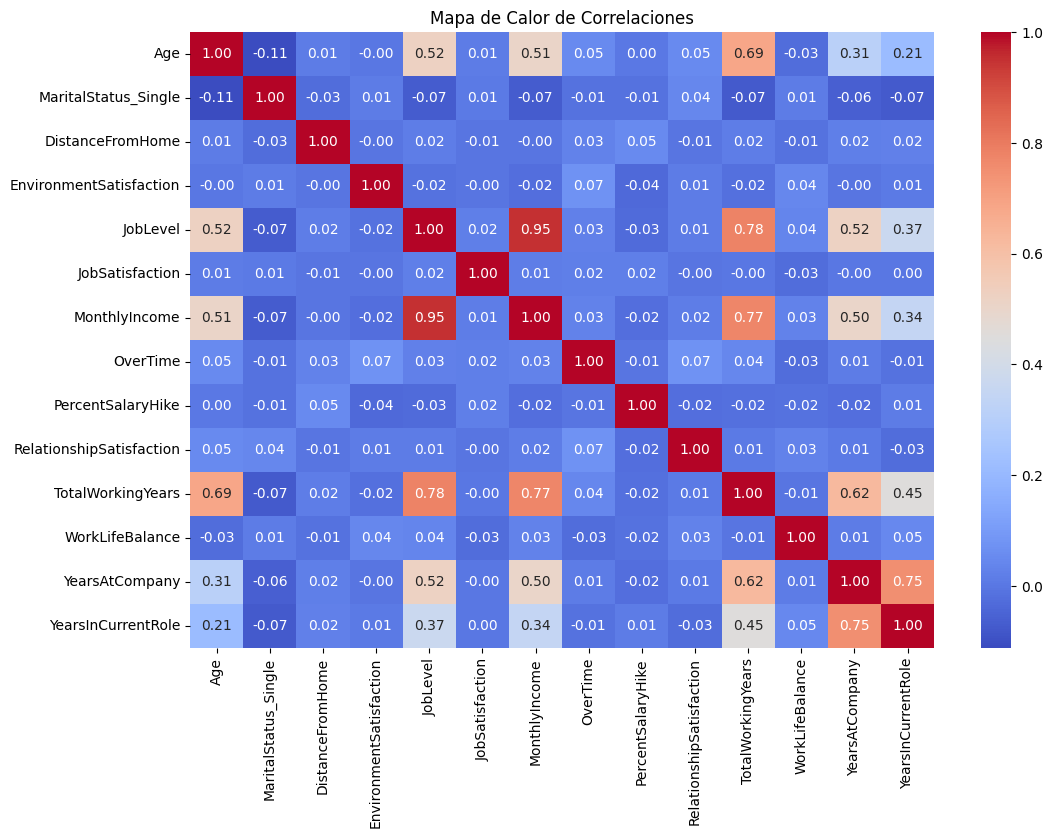

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz
variables_corr = ['Age','MaritalStatus_Single','DistanceFromHome','EnvironmentSatisfaction','JobLevel','JobSatisfaction','MonthlyIncome','OverTime','PercentSalaryHike','RelationshipSatisfaction','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole']

# Matriz completa de correlación
corr_matrix = df_clean[variables_corr].corr(method='pearson')

# Dibuja el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

### Eliminaciones:
- JobLevel
- YearsInCurrentRole
- TotalWorkingYears
  - Y creo: TotalWorkingYears / CompaniesWorked. Un ratio alto indica estabilidad.

In [10]:
import numpy as np

df_clean['ratio_years_company'] = df_clean['TotalWorkingYears'] / df_clean['NumCompaniesWorked']
df_clean = df_clean.drop(columns=['JobLevel','YearsInCurrentRole','TotalWorkingYears'])

df_clean['ratio_years_company']
df_clean['ratio_years_company'] = df_clean['ratio_years_company'].replace([np.inf, -np.inf], 0)

df_clean['ratio_years_company']

0        4.000000
1       18.000000
2        0.875000
3        0.000000
4        2.833333
          ...    
1318     6.000000
1319     3.666667
1320     4.000000
1321     3.750000
1322     3.500000
Name: ratio_years_company, Length: 1323, dtype: float64

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1323 non-null   int64  
 1   DistanceFromHome                   1323 non-null   int64  
 2   Education                          1323 non-null   int64  
 3   EnvironmentSatisfaction            1323 non-null   int64  
 4   Gender                             1323 non-null   int64  
 5   JobInvolvement                     1323 non-null   int64  
 6   JobSatisfaction                    1323 non-null   int64  
 7   MonthlyIncome                      1323 non-null   int64  
 8   NumCompaniesWorked                 1323 non-null   int64  
 9   OverTime                           1323 non-null   int64  
 10  PercentSalaryHike                  1323 non-null   int64  
 11  PerformanceRating                  1323 non-null   int64

Para este dataset creo que no es necesario eliminar los outliers, ya que precisamente estos valores son de gran ayuda para que el modelo detecte casos de esas caracterísicas

# 🌳 RANDOM FOREST
### Aplicaciones:
---
#### 1. GridSearch
#### 2. SMOTE para el desbalanceo

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df_model_rf = df_clean.copy()

X = df_model_rf.drop('Attrition', axis=1)
y = df_model_rf['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 🏋Entrenamiento de Modelo
### ▶ Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de parámetros a buscar
param_grid = {
    # Número de árboles: probar entre 100 (por defecto) y 500
    'n_estimators': [100, 200, 500],

    # Profundidad máxima: 5, 10 o dejar que crezca sin límite (None)
    'max_depth': [5, 10, None],

    # Mínimo de muestras por hoja: 1 (por defecto), 5 o 10
    'min_samples_leaf': [1, 5, 10]
}

# Inicializar GridSearchCV: scoring='accuracy' para maximizar la precisión
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42,class_weight='balanced_subsample'),
    param_grid=param_grid,
    scoring='recall',
    cv=5,               # 5-fold Cross-Validation
    verbose=2,          # Muestra el progreso
    n_jobs=-1           # Usa todos los núcleos del procesador
)

grid_search.fit(X_train, y_train)

# Guardar los mejores parámetros encontrados y el mejor modelo
best_params = grid_search.best_params_
rf_optimizado = grid_search.best_estimator_

# Predecir con el modelo optimizado
pred = rf_optimizado.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=5, min_

## 🥇 Metricas

# ---------- CREAR FUNCION -----------

In [14]:
# Obtener Accuracy final
accuracy_final = accuracy_score(y_test, pred)

# Obtener el reporte de clasificación (incluye Precision y Recall)
reporte_final = classification_report(y_test, pred)

# Simulación de Resultados para el Informe:
print(f"\nAccuracy del Modelo Final Optimizado (X_test): {accuracy_final:.4f}")
print("\nReporte de Clasificación del Modelo Final:")
print(reporte_final)


Accuracy del Modelo Final Optimizado (X_test): 0.8302

Reporte de Clasificación del Modelo Final:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       222
           1       0.48      0.47      0.47        43

    accuracy                           0.83       265
   macro avg       0.69      0.68      0.68       265
weighted avg       0.83      0.83      0.83       265



# ---------- CREAR FUNCION -----------
## Matriz de Confusion

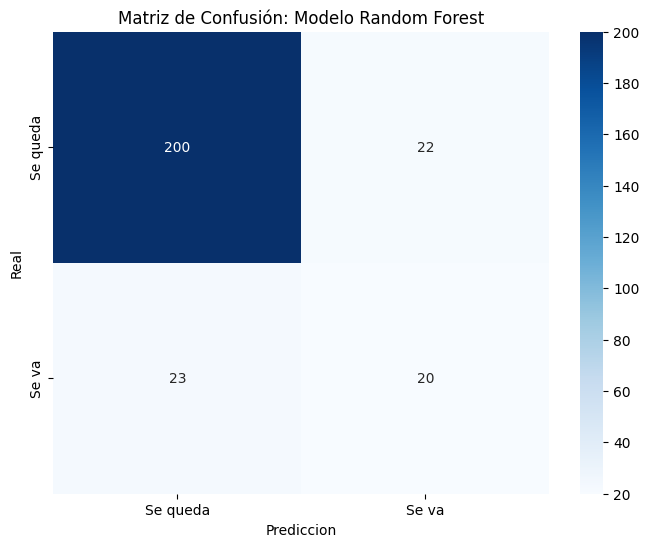

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Calcular la matriz
cm = confusion_matrix(y_test, pred)

# 3. Visualización elegante con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Se queda', 'Se va'],
            yticklabels=['Se queda', 'Se va'])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de Confusión: Modelo Random Forest')
plt.show()

# ---------- CREAR FUNCION -----------
## Peso de variables

/tmp/ipykernel_1588/2390964613.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(25), palette='viridis')


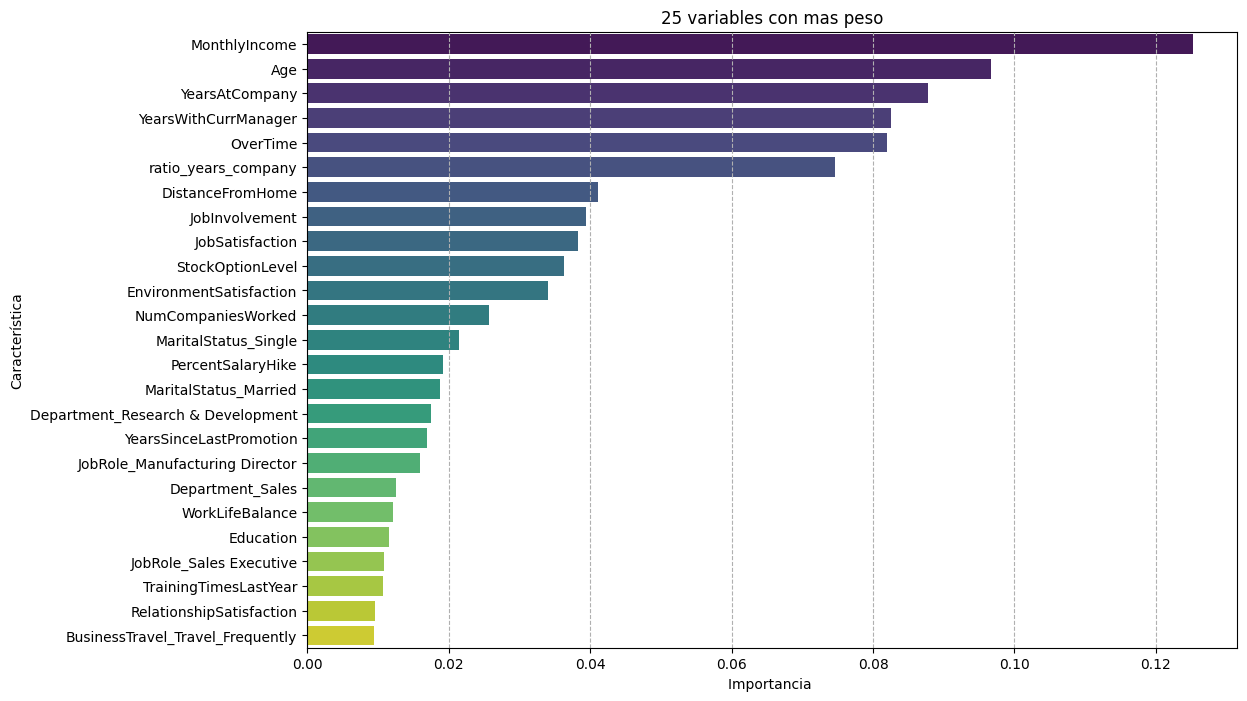

In [16]:
feature_importances = rf_optimizado.feature_importances_

# 2. Obtener los nombres de las columnas de X_train
feature_names = X_train.columns

# 3. Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 4. Ordenar el DataFrame por importancia de forma descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(25), palette='viridis')
plt.title('25 variables con mas peso')
plt.xlabel('Importancia ')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--')
plt.show()

# ------- RANDOM FOREST 2 --------

In [17]:
from sklearn.feature_selection import RFE

X = df_model_rf[importance_df['Feature'].head(15)]
y = df_model_rf['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

grid_search.fit(X_train, y_train)

# Guardar los mejores parámetros encontrados y el mejor modelo
best_params = grid_search.best_params_
rf_optimizado = grid_search.best_estimator_

# Predecir con el modelo optimizado
pred = rf_optimizado.predict(X_test)

# Obtener Accuracy final
accuracy_final = accuracy_score(y_test, pred)

# Obtener el reporte de clasificación (incluye Precision y Recall)
reporte_final = classification_report(y_test, pred)

# Simulación de Resultados para el Informe:
print(f"\nAccuracy del Modelo Final Optimizado (X_test): {accuracy_final:.4f}")
print("\nReporte de Clasificación del Modelo Final:")
print(reporte_final)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.3s[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s

[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=5, n_e

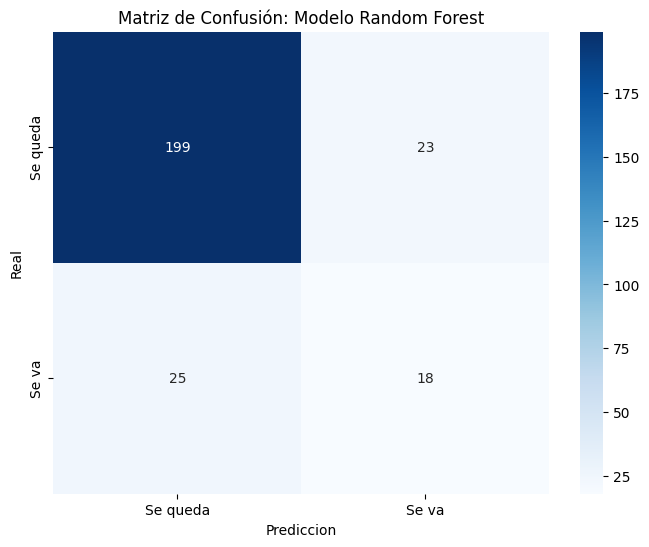

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Calcular la matriz
cm = confusion_matrix(y_test, pred)

# 3. Visualización elegante con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Se queda', 'Se va'],
            yticklabels=['Se queda', 'Se va'])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de Confusión: Modelo Random Forest')
plt.show()

# ▶ ------ SMOTE -------

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline as ImPipeline

pipeline = ImPipeline([
    ('smote_enn',SMOTEENN(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced_subsample'))
])

param_grid = {
    'rf__n_estimators': [100, 200, 500],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_leaf': [1, 5, 10]
}

gs_smote = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1
)

gs_smote.fit(X_train, y_train)

# Predecir con el modelo optimizado
pred_smote = gs_smote.predict(X_test)

# Obtener Accuracy final
accuracy_final = accuracy_score(y_test, pred_smote)

# Obtener el reporte de clasificación (incluye Precision y Recall)
reporte_final = classification_report(y_test, pred_smote)

# Simulación de Resultados para el Informe:
print(f"\nAccuracy del Modelo Final Optimizado (X_test): {accuracy_final:.4f}")
print("\nReporte de Clasificación del Modelo Final:")
print(reporte_final)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.6s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.7s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.7s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.7s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.7s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.7s
[CV] END rf__max_depth=5, rf

/tmp/ipykernel_1588/1509107247.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(25), palette='viridis')


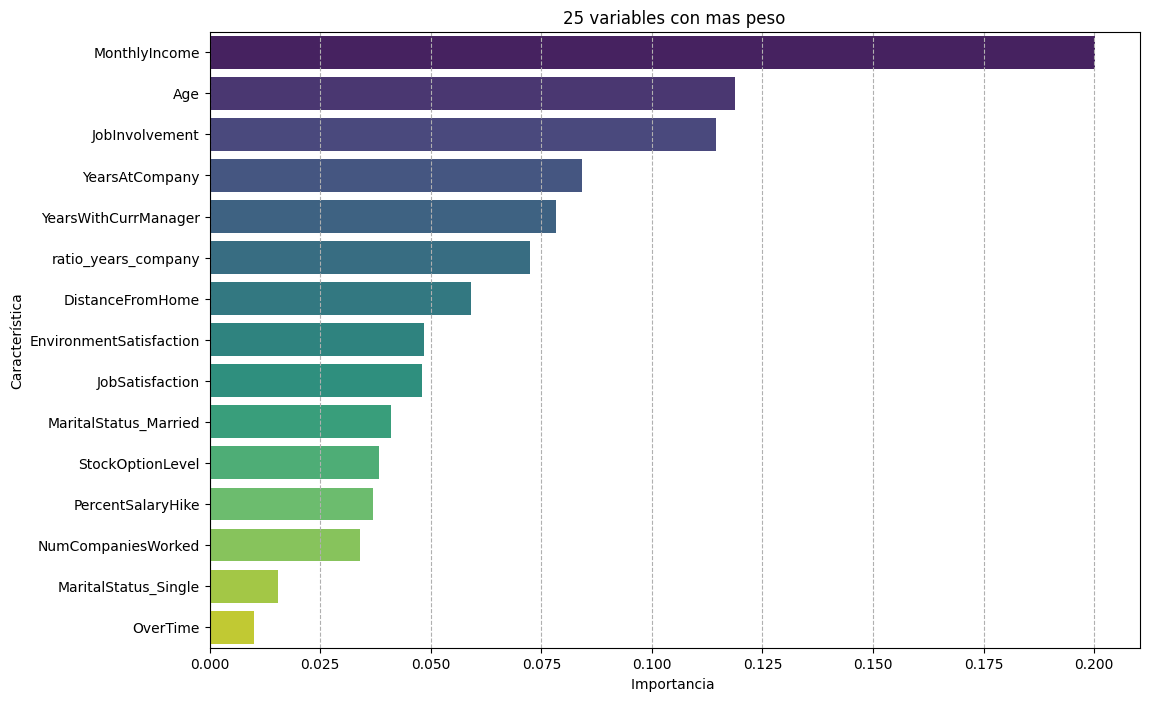

In [20]:
feature_importances = gs_smote.best_estimator_.named_steps['rf'].feature_importances_

# 2. Obtener los nombres de las columnas de X_train
feature_names = X_train.columns

# 3. Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 4. Ordenar el DataFrame por importancia de forma descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(25), palette='viridis')
plt.title('25 variables con mas peso')
plt.xlabel('Importancia ')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--')
plt.show()

In [21]:
from sklearn.feature_selection import RFE

X = df_model_rf[importance_df['Feature'].head(15)]
y = df_model_rf['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

pipeline_v2 = ImPipeline([
    ('smote_enn', SMOTEENN(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced_subsample'))
])

param_grid = {
    'rf__n_estimators': [100, 200, 500],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_leaf': [1, 5, 10]
}

gs_smote = GridSearchCV(
    estimator=pipeline_v2,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1
)

gs_smote.fit(X_train, y_train)

# Predecir con el modelo optimizado
pred_smote = gs_smote.predict(X_test)

# Obtener Accuracy final
accuracy_final = accuracy_score(y_test, pred_smote)

# Obtener el reporte de clasificación (incluye Precision y Recall)
reporte_final = classification_report(y_test, pred_smote)

# Simulación de Resultados para el Informe:
print(f"\nAccuracy del Modelo Final Optimizado (X_test): {accuracy_final:.4f}")
print("\nReporte de Clasificación del Modelo Final:")
print(reporte_final)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.3s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.3s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.3s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.3s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.6s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.6s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.6s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.6s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.7s
[CV] END rf__max_depth=5, rf